# Sanderson's Wonderland in Python
### Angewandte Systemwissenschaften I
#### Python - Wonderland
Einheit 3 / 10

# Semesterplan
---
0. Anaconda und Pip
1. Einführung in Python
2. Matplotlib: Eine Einführung ins Wonderland - Modell
3. **Jupyter-Notebooks: Wonderland in Python**
4. Funktionale Programmierung & Python-Module
5. Python-Pakete und Workflow
6. Objekt-orientierte Programmierung
7. Agenten-basierte Modellierung
8. Animationen zur Modellentwicklung
9. Multiprocessing & Sensitivity Analysis
10. Projektpräsentationen

## Inhalt
+ Diskretisierung allgemein
+ Diskretisierung des Wonderland - Modells
+ Wonderland in Python
+ Erkundung unserer ersten Implementation

## Jupyter
Jupyter ist eine Anwendung welche sich besonders **gut zur Prototypisierung** und **Darstelung** von Code eignet. <br>
Hier kann man schnell eine **Code - Basis schaffen** und **Daten** sowie **Ergebnisse analysieren**.

Um ein **neues Projekt** in Jupyter zu erstellen geht man am besten **wie folgt** vor:

+ Anaconda starten
+ Richtiges Environment wählen, oder neues erstellen
+ Jupyter starten
+ Notebook anlegen

## Vom Differentialgleichungssystem zum Computermodell
+ Differentialgleichungen beschreiben die **Änderung** der Zustandsvariablen.
    + Beschreiben in jedem Punkt die Ableitung ($\rightarrow$ die **Tangente**) der Gleichung!

+ Wir brauchen also:
    + Anfangsbedingungen
    + Ein diskretisiertes Gleichungssystem

## Anfangsbedingungen

Die Anfangsbedingungen für die Zustandsvariablen in unserem Wonderland, <br>
**entnehmen wir der Definition** von [Sanderson](http://pure.iiasa.ac.at/id/eprint/3613/):
#  
Population: $x(t_0) = x_0 = 1.0$ 

Wirtschaft: $y(t_0) = y_0 = 1.0$ 

Umweltzustand: $z(t_0) = z_0 = 0.98$ 

Technologie: $p(t_0) = p_0 = 1.0$

## Diskretisiertes Gleichungssystem
+ Mittels **explizitem Euler-Verfahren**
    + Für unsere Anwendung **reicht** das Euler-Verfahren
    + Genauere Alternativen sind: Das Heun-, das Runge-Kutta- und das Butcher-Verfahren
    
+ Wir benötigen:
    + Schrittweite $h$
    + Gekoppelte gewöhnliche Differentialgleichungen
        + Also die Gleichungen des Wonderland-Modells aus Einheit 2

## Explizites Euler-Verfahren

Um mit dem expliziten Euler-Verfahren zu beginnen, benötigen wir
**diskrete Zeitschritte** $t_k$:

## $t_k = t_0 + k * h$

Dabei ist $h$ die **Schrittweite**. Je kleiner diese ist, desto genauer 
stimmt diese mit der kontinuierlichen Form überein. <br>
Die Variable $k$ ist die **Schrittzahl**: $k \in \mathbb{N}$

**Bekannt** sind uns dabei bereits die betroffene **Differentialgleichung** und ihre **Startbedingungen**.

## $\frac{dy}{dt} = f(t,y)$
### $y(t_0) = y_0$

Wir **suchen** eine Funktion $g$ welche uns verrät wie viel wir jeweils zum **vorherigen Wert** <br>
der Zustandsvariable **addieren** müssen, um **zum nächsten Wert** zu gelangen.

## $y_{k+1} = y_k + g(t_k, y_k)$

Diese Funktion $g(t_k,y_k)$ kann durch $h * f(t_k,y_k)$ **approximiert** werden.
Wieder gilt, **je kleiner $h$ desto genauer** ist diese Näherung.

Es ergibt sich also, dass die Zustandsvariable im nächsten Zeitschritt **gegeben ist durch**:

## $y_{k+1} = y_k + h*f(t_k, y_k)$

# Funktionen
Dieses Verfahren wollen wir **nun auf** das Differentialgleichungssystem welches <br>
das **Wonderland** - Modell bildet **anwenden**.

## Technologie

Wir starten mit der **einfachsten** der Gleichungen des Wonderlands,
**der Technologie** $p$. <br>
Ihre kontinuierliche Definition lautet: $\frac{dp}{dt}=-\chi p$ . Diese bildet also unser $f$.
Den Startwert entnehmen wir Sandersons Publikation: $p_0 = 1$

Wie lautet nun die diskrete Variante? <br>
$p_{t+1} =$

Wir erinnern uns daran, dass die diskrete Formel $y_{k+1} = y_k + h * f(t_k,y_k)$ gelautet hat.

Damit ergibt sich: <br>
$p_{t+1} = p_t + h * \frac{dp}{dt}$

Wir können $h=1$ wählen und gelangen so mit $\frac{dp}{dt}=-\chi p \rightarrow f(p_t) = - \chi p_t$ zu: <br>
$p_{t+1} = p_t + 1 * -\chi p_t$

Natürlich können wir die Multiplikation mit 1 einfach weglassen und vereinfachen: <br>
$p_{t+1} = p_t -\chi p_t$

Dann heben wir noch $p_t$ heraus und gelangen zu: <br>
$p_{t+1} = p_t (1-\chi)$

Diese Gleichung wird nun die erste in unserem Jupyter - Notebook:

In [1]:
def technologie(p):
    return p*(1.0-CHI)

## Wirtschaft
Die kontinuierliche Definition für die **Änderung der Wirtschaft** lautet, wie **aus Teil 2** bekannt: <br>
 $\frac{dy}{dt}=y[\gamma-(\gamma+\eta)(1-z)^{\lambda}]$

Somit lautet die diskrete Variante, nach dem gleichen Verfahren **wie schon zur Technologie**: <br>
 $y_{t+1}=y_t[1+\gamma-(\gamma+\eta)(1-z_t)^{\lambda}]$
 
 Man beachte, dass auch der referenzierte **Umweltzustand** nun aus dem **vorherigen Zeitschritt** entstammt.
 
 Dies ist wichtig wenn wir unsere Python - Funktion schreiben, <br>
 da diese nun **von zwei Zustandsvariablen abhängig** ist.

In [2]:
def wirtschaft(y,z):
    return y*(1.0+GAMMA-(GAMMA+ETA)*(1.0-z)**LAMBDA)

## Bevölkerung
Für die Bevölkerung wird es nun noch **etwas schwieriger**. Nicht nur ist ihre **Änderung** 
von **zwei Zustandsvariablen abhängig**, <br>
sondern ihre Definition stützt sich auf zwei **andere 
Funktionen**: Geburten- und Sterberate.

$\frac{dx}{dt}=x(b(y,z)-d(y,z))$

Bei der **Diskretisierung** können wir dennoch so fortfahren **wie schon zuvor** für Technologie 
und Wirtschaft:

$x_{t+1}=x_t[1+(b(y,z)-d(y,z))]$

Das können wir so auch schon **in unser Notebook** eintragen:

In [3]:
def population(x,y,z):
    return x*(1.0+geburtenrate(y,z)-sterberate(y,z))

Doch wie sehen jetzt die **Änderungsraten** aus?

### Geburten- und Sterberate

Wir erinnern uns an die Gleichungen zur Geburten- und Sterberate:

$b(y,z) = \beta_1 ( \beta_2 - \frac{e^{\beta \bar{y}}}{1+e^{\beta \bar{y}}} )$ 

$d(y,z) = \delta_1 ( \delta_2 - \frac{e^{\alpha \bar{y}}}{1+e^{\alpha \bar{y}}} ) (1+\delta_3 (1-z)^\theta)$

#### Netto - Produktion

Beide **Raten** hängen von der Netto - Produktion $\bar{y}$ ab,
diese wollen wir **zuerst** implementieren.

$\bar{y}(y,z) = y - c(y,z)$

Dabei soll die **gesamte Exponentialfunktion** in den Brüchen in einer Funktion zusammengefasst werden. <br>
Der einzige **Unterschied** zwischen den Raten ist dabei der Parameter mit welchem $\bar{y}$ multipliziert wird.

In [4]:
def y_strich(CONST,y,z):
    return exp(CONST * (y - umweltschutz(y,z)))

Außerdem benötigen wir nun die **Exponentialfunktion** in Python:
```from math import exp```

### Kosten des Umweltschutzes

In ```y_strich``` besteht nun eine Abhängigkeit von der Funktion $c(y_t,z_t)$, <br>
diese wollen wir als nächstes in unser Notebook einbauen:

$c = \phi * (1.0 -z)^\mu * y$

In [5]:
def umweltschutz(y,z):
    return PHI * (1.0-z)**MY * y

### Implementation der Geburten- und Sterberate:

Nun sind auch die beiden Änderungsraten der Population **leicht in Python zu schreiben**.

Wir nennen das Ergebnis der ```y_strich``` - Funktion mit **passendem Parameter** ```e```, <br>
um die Zeile für den **Rückgabewert** leichter verständlich zu gestalten:

In [6]:
def geburtenrate(y,z):
    e = y_strich(BETA,y,z)
    return BETA1 * (BETA2 - e/(1.0+e))

def sterberate(y,z):
    e = y_strich(ALPHA,y,z)
    return DELTA1 * (DELTA2 - e/(1.0+e)) * (1.0 + DELTA3 * (1.0-z)**THETA)

## Umwelt

Für die Diskretisierung der letzten Differentialgleichung haben wir uns 
eine **kleine Challenge** aufgehoben. <br> Die kontinuierliche Änderung des
Umweltzustandes lautet:

$\frac{dz}{dt}=\nu z(1-z)(e^{\delta z^{\rho}-\omega f(x,y,z,p)}-1)$

Die diskrete Definition wird nun mit $z_{t+1} = z_t + h *\frac{dz}{dt}$ zu:

$z_{t+1} = z_t + \nu (z_t-z_t^2)[e^{\delta z_t^{\rho}-\omega f(x_t,y_t,z_t,p_t)}-1]$

Und in Python:

In [7]:
def umwelt(x,y,z,p):
    g = exp(DELTA*z**RHO - OMEGA*fluss_emissionen(x,y,z,p))
    return z + NY * (z-z**2) * (g - 1.0)

### Fluss der Umweltverschmutzungen

Uns fehlt nun noch der Teil $f(x,y,z,p)$ unserer Funktion.

$f(x,y,z,p)=pxy-\kappa[\frac{e^{\epsilon c(y,z) x}}{1 + e^{\epsilon c(y,z) x}}-0.5]$

Diese verwendet wieder eine Hilfsfunktion ```c_strich``` in ihrer Python - Version:

In [8]:
def fluss_emissionen(x,y,z,p):
    c_strich = exp(EPSILON * umweltschutz(y,z) * x)
    return x*y*p - KAPPA * (c_strich/(1.0+c_strich) - 0.5)

## Parameter
In unseren Funktionen haben wir eine ganze Reihe an Parametern genutzt, 
welche wir **soweit nicht definiert** haben.

Diese entnehmen wir Milik et al. (1996) und definieren sie um den **Überblick** 
zu behalten für jeden **Teilbereich**:

In [9]:
# Geburtenrate
BETA1 = 0.04; BETA2 = 1.375; BETA = 0.16

In [10]:
# Sterberate
ALPHA = 0.18; DELTA1 = 0.01; DELTA2 = 2.5; DELTA3 = 4.0; THETA = 15.0

In [11]:
# Wirtschaft
GAMMA = 0.02; ETA = 0.1; LAMBDA = 2.0

In [12]:
# Umwelt
KAPPA = 2.0; EPSILON = 0.02; DELTA = 1.0; RHO = 2.0; OMEGA = 0.1; NY = 1.0

In [13]:
# Umweltschutz
PHI = 0.5; MY = 2.0

In [14]:
# Technologie
CHI = 0.04

# Sammlung der Funktionen

Wenn nun alle Funktionen richtig **im Jupyter - Notebook** eingegeben worden sind, 
sollte sich dort **folgender Code** finden:

*Die Reihenfolge der Funktionen ist dabei nicht relevant.*

In [15]:
from math import exp

def technologie(p):
    return p*(1.0-CHI)

def wirtschaft(y,z):
    return y*(1.0+GAMMA-(GAMMA+ETA)*(1.0-z)**LAMBDA)

def population(x,y,z):
    return x*(1.0+geburtenrate(y,z)-sterberate(y,z))

def geburtenrate(y,z):
    e = y_strich(BETA,y,z)
    return BETA1 * (BETA2 - e/(1.0+e))

def sterberate(y,z):
    e = y_strich(ALPHA,y,z)
    return DELTA1 * (DELTA2 - e/(1.0+e)) * (1.0 + DELTA3 * (1.0-z)**THETA)

def y_strich(CONST,y,z):
    return exp(CONST * (y - umweltschutz(y,z)))

def umwelt(x,y,z,p):
    g = exp(DELTA*z**RHO - OMEGA*fluss_emissionen(x,y,z,p))
    z = z + NY * (z-z**2) * (g - 1.0)
    if z > 1:
        z = 1.0

def fluss_emissionen(x,y,z,p):
    c_strich = exp(EPSILON * umweltschutz(y,z) * x)
    return x*y*p - KAPPA * (c_strich/(1.0+c_strich) - 0.5)

def umweltschutz(y,z):
    return PHI * (1.0-z)**MY * y

## Zustand
Alle unsere Funktionen hängen vom Wert ihrer Zustandsvariable zum **vorherigen
Zeitpunkt** ab.

Dieses **Anfangswertproblem** können wir einfach lösen indem wir die Startwerte aus
**Sanderson** (1992) übernehmen: <br>
$x_0 = 1 , y_0 = 1 , z_0 = 0.98 , p_0 = 1$

Somit schreiben wir **in Python**:

In [16]:
x_0 = y_0 = p_0 = 1.0
z_0 = 0.98

Nun können wir endlich zur **Analyse** unseres diskretisierten Modells übergehen!

# Analyse

Welcher **Python - Typ** eignet sich am besten **um die Ergebnisse** unserer Berechnungen **zu speichern** ?

In [17]:
ergebnis = [(x_0,y_0,z_0,p_0)]

Wie berechnen wir nun unsere **Simulation**? <br>
Wir wollen uns den **Verlauf** des Schicksals von Wonderland **über 300 Jahre** ansehen.

In [18]:
def simulation(jahre=300):
    ergebnis = [(x_0,y_0,z_0,p_0)]
    for jahr in range(1,jahre):
        x, y, z, p = ergebnis[jahr-1]
        x_neu = population(x,y,z)
        y_neu = wirtschaft(y,z)
        z_neu = umwelt(x,y,z,p)
        p_neu = technologie(p)
        ergebnis.append((x_neu, y_neu, z_neu, p_neu))
    return ergebnis

**Grafisch** können wir unser Ergebnis nun wieder mit dem **Paket** ```matplotlib``` betrachten. <br>
Mittels des **Modul**s ```pyplot``` welches wir mit dem Namen ```plt``` **import**ieren erstellen wir <br>
einen Graphen unserer **Zustandsvariablen**.

Dabei hilft uns die **Funktion** ```plot``` welche in diesem Modul definiert ist.

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

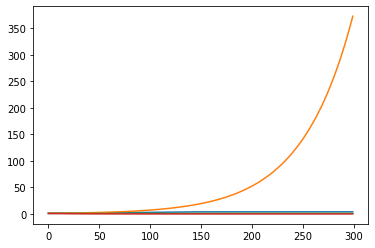

In [20]:
plt.plot(simulation())

Der **Wirtschaft** scheint es ausgezeichnet zu gehen, sie schießt förmlich **exponentiell** in die Höhe. <br>
Damit **verdeckt** sie leider auch das Verhalten unserer anderen Zustandsvariablen.

Vorerst wollen wir sie daher einfach auslassen um den Verlauf der **anderen
analysieren** zu können.

**Wie** verfahren wir, wenn wir eine der Variablen in ```simulation()``` **nicht
darstellen** lassen wollen?

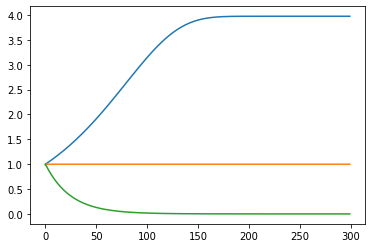

In [21]:
plt.plot([(x,z,p) for x,_,z,p in simulation()])

### Krise im Wonderland

Wie wir aus der letzten Einheit wissen reicht eine **geringfügig langsamere Entwicklung** der Technologie, <br>
um das Wonderland in die **Umwelt - Krise** stürzen zu lassen.

Wir ändern also den **kritischen Paramter** $\chi$ (Chi) von 0.04 auf einen Wert jenseits des **kritischen Übergangs** von 0.01.

In [22]:
CHI = 0.01

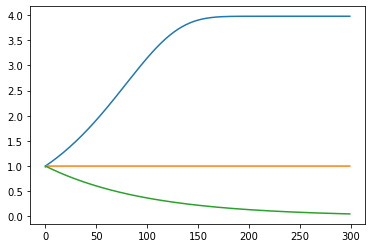

In [23]:
plt.plot([(x,z,p) for x,_,z,p in simulation()])

### Warum bleibt unser Wonderland stabil?

Betrachten wir die Verläufe von **Technologie, Wirtschaft und Population**, 
zeigen diese deutliche Dynamik.

Beim **Umwelt**zustand scheint allerdings **keine all zu große Dynamik** oder Veränderung 
stattgefunden haben. <br> Die Vermutung liegt nahe, dass hier die **Wurzel unseres Problems**
zu liegen kommt.


Das liegt an der **Ungenauigkeit** welche wir durch unsere **Diskretisierung** und dadurch, <br>
dass **Python** nur eine gewisse **Anzahl an Bits** im Speicher zur Verfügung hat, einführen.

Häufig ist Pythonistas **nicht bewusst**, dass der Computer intern ihre Eingabe nur **approximiert**. <br>
Das liegt auch an der **Darstellung** welche in Wirklichkeit nur eine **gerundete** Zahl zeigt.

Auf den meisten Computern würde eine Ausgabe des **tatsächlichen Werts** von ```0.1``` in Python <br>
in etwa so aussehen:

~~~python
>>> 0.1
0.1000000000000000055511151231257827021181583404541015625
~~~

**Rundungsfehler** können sich im Programm **fortsetzen** und somit das gesamte **Ergebnis verfälschen**.

Wir können allerdings unsere **Gleichung** für die Umwelt so **umformen**, dass wir diese **Dynamik nicht verlieren**!

In [24]:
import wonderland as wl
umwelt = wl.Wonderland(wl.parameters.horror_parameters).umwelt

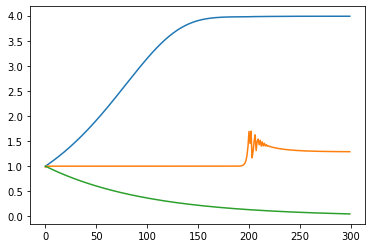

In [25]:
plt.plot([(x,z,p) for x,_,z,p in simulation()])

<div class="alert alert-block alert-danger">
<h3>Übungsaufgabe: Finde zumindest eine umgeformte Variante für die Umwelt-Funktion,<br>
    mit welcher sich bei CHI = 0.01 die Umwelt dynamisch verhält.</h3>
    
Die Gleichung für den Umweltzustand $z$ so wie wir sie derzeit hier definiert hatten lautet:<br>
$z_{t+1} = z_t + \nu (z_t-z_t^2)[e^{\delta z_t^{\rho}-\omega f(x_t,y_t,z_t,p_t)}-1]$

<h4>Beziehungsweise in Python:</h4>

<pre><code class="python">def umwelt(x,y,z,p):
    g = exp(DELTA*z**RHO - OMEGA*fluss_emissionen(x,y,z,p))
    return z + NY * (z-z**2) * (g - 1.0)
</code></pre>

Mit einer <strong>mathematischen Umformung</strong> von $z_{t+1}$ bzw. der <strong>letzten Zeile</strong> dieses Codes lässt sich das <strong>dynamische Ergebnis</strong> erreichen.

<h4>Tipps:</h4>
<i>Binome: $\quad (a-b) * (c-d) = a*c - b*c - a*d + b*d$</i>
<br><br>
<i>Herausheben: $\quad (a^2+2*a) = a * (a+2)$</i>
<br><br>
<i>Die Exponentialfunktion braucht <strong>nicht umgeformt</strong> werden!</i>

<h3>Pro Form 2 Punkte! Einen für den Code, einen für den mathematischen Ausdruck.</h3>
</div>